импорты

In [1]:
import os
import numpy as np
from natsort import natsorted
import matplotlib
import matplotlib.pyplot as plt
import re
import pandas as pd
from scipy import signal

константы

In [2]:
# 153.8336486816406250 884.2712384333286764    измеряемый диапазон. 0-2136 диапазон данных
start_nm = 400  # нм
end_nm = 700  # нм

x = pd.read_excel("x points nm.xlsx")
x = np.array(x["nm"].values[1 : len(x) - 1])


def nm_to_x(nm):
    return xint.index(nm) + 1


def x_to_nm(index):
    return x[index]


# номера точек в массиве по координате х
for i in range(len(x)):
    if x[i] > start_nm:
        start_x = i
        break
for i in range(len(x) - 1, 0, -1):
    if x[i] < end_nm:
        end_x = i
        break
x = x[start_x:end_x]
xint = list(np.array(x, dtype=int))
tail_x = nm_to_x(650)
head_x = nm_to_x(475)

функции получения данных

In [3]:
def get_data_rmr(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = re.split(",", spec.read())
            _data.append(np.array(spec[start_x:end_x], dtype=float))
    #    _data.append(get_rmr(spec))
    return _data

получение данных из rmr

In [4]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data_row = []  # изанчальные графики
data = []  # сглаженные графики
smooth = True
main_folder = r"C:\Users\Nik\Desktop\Новая папка"
main_folder = main_folder.replace(chr(92), "/")
folders_list = list(natsorted(os.listdir(main_folder)))
print(main_folder)
print(folders_list)


for i in range(len(folders_list)):
    data_row.append(get_data_rmr(main_folder + "/" + folders_list[i] + "/"))
    print(folders_list[i], " recived ", len(data_row[i]))


if smooth == True:
    for i in range(len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()
print("получено " + str(len(data_row)) + " папок")

C:/Users/Nik/Desktop/Новая папка
['2_11', '2_14']
2_11  recived  4450
2_14  recived  4250
получено 2 папок


добавить 1 папку

In [4]:
data = []
data_row = []
folders_list = []

In [5]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
smooth = True
main_folder = r"C:\Users\Nik\Desktop\Новая папка\2_14"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.append(folders_list, "2_14")
print(main_folder)
print(folders_list)


data_row.append(get_data_rmr(main_folder + "/"))
# print("data from " + str(folders_list[i]) + " recived")
print("получено " + str(len(data_row)) + " папок")

if smooth == True:
    for i in range(len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()

C:/Users/Nik/Desktop/Новая папка/2_14
['2_14']
получено 1 папок


построение водопада капли

In [ ]:
l = len(data[0][0])
s = 260
n = 360
print(n-s)

In [ ]:
z=[]

%matplotlib widget
a=0
for i in range(0,n):
    z.append(data[0][i])
    a+=1
z=np.array(z)


In [ ]:
key=[[260,270,"Gray"],
     [270,290,"Blue"],
     [290,320,'Red'],
     [320,355,"Blue"],
     [355,360,"Gray"],]

In [ ]:
print(np.arange(0,l,75))

In [ ]:
fig = plt.figure(figsize=(3.5, 3.5),dpi=350)
# projection='3d'
ax = plt.axes(projection="3d")
a=0
for i in range(len(key)):
    X = np.linspace(0,l,l)

    for j in range(key[i][1]-key[i][0]):
        a+=1
        ax.plot(X,[a]*len(X),data[0][key[i][0]+j], c=key[i][2], alpha=0.4)
   # ax.plot(X, Y, z[key[i][0]:key[i][1]],cmap=key[i][2],lw=20, antialiased=False, alpha=key[i][3])
# cmap=key[i][2], 
ax.set_xlabel("Wavelwnght, nm")
ax.set_xticks(np.linspace(0,l,3))
ax.set_xticklabels(np.arange(start_nm,end_nm,100))
ax.set_ylabel("Spectra number")
ax.set_zlabel("Absorbance, a.u.")
plt.savefig('52.png')
plt.show()

добавить папку с папками

In [ ]:
main_folder = r"C:\Users\Nik\Desktop\оливка обработка\10 points"
main_folder = main_folder.replace(chr(92), "/")
_a = len(folders_list)
folders_list.extend(natsorted(os.listdir(main_folder)))

print(main_folder)
print(folders_list)

for i in range(_a, len(folders_list)):
    data_row.append(get_data_rmr(main_folder + "/" + folders_list[i] + "/"))
    print(folders_list[i], " recived ", len(data_row[i]))


if smooth == True:
    for i in range(_a, len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()
print("получено " + str(len(data_row)) + " папок")

функции выборки максимума и разницы

In [11]:
# функции для получения данных
def dmax(mas: np.array):
    return np.max(mas[nm_to_x(500):nm_to_x(600)])


def dmax_650(mas: np.array):
    return np.max(mas) - mas[tail_x]


def dmax_list(mas: list):
    _max = []
    for a in mas:
        _max.append(np.max(a[nm_to_x(500):nm_to_x(560)]))
    return _max


def dmax_650_list(mas: list):
    _max = []
    for i in range(len(mas)):
        _max.append(np.max(mas[i][nm_to_x(500):nm_to_x(560)]) - mas[i][tail_x])
    return _max

таймлайн

In [6]:
def zero_index(mas):
    _zero = []
    for i in range(len(mas)):
        if np.max(mas[i]) < 0.1:
            _zero.append(i)
    return _zero

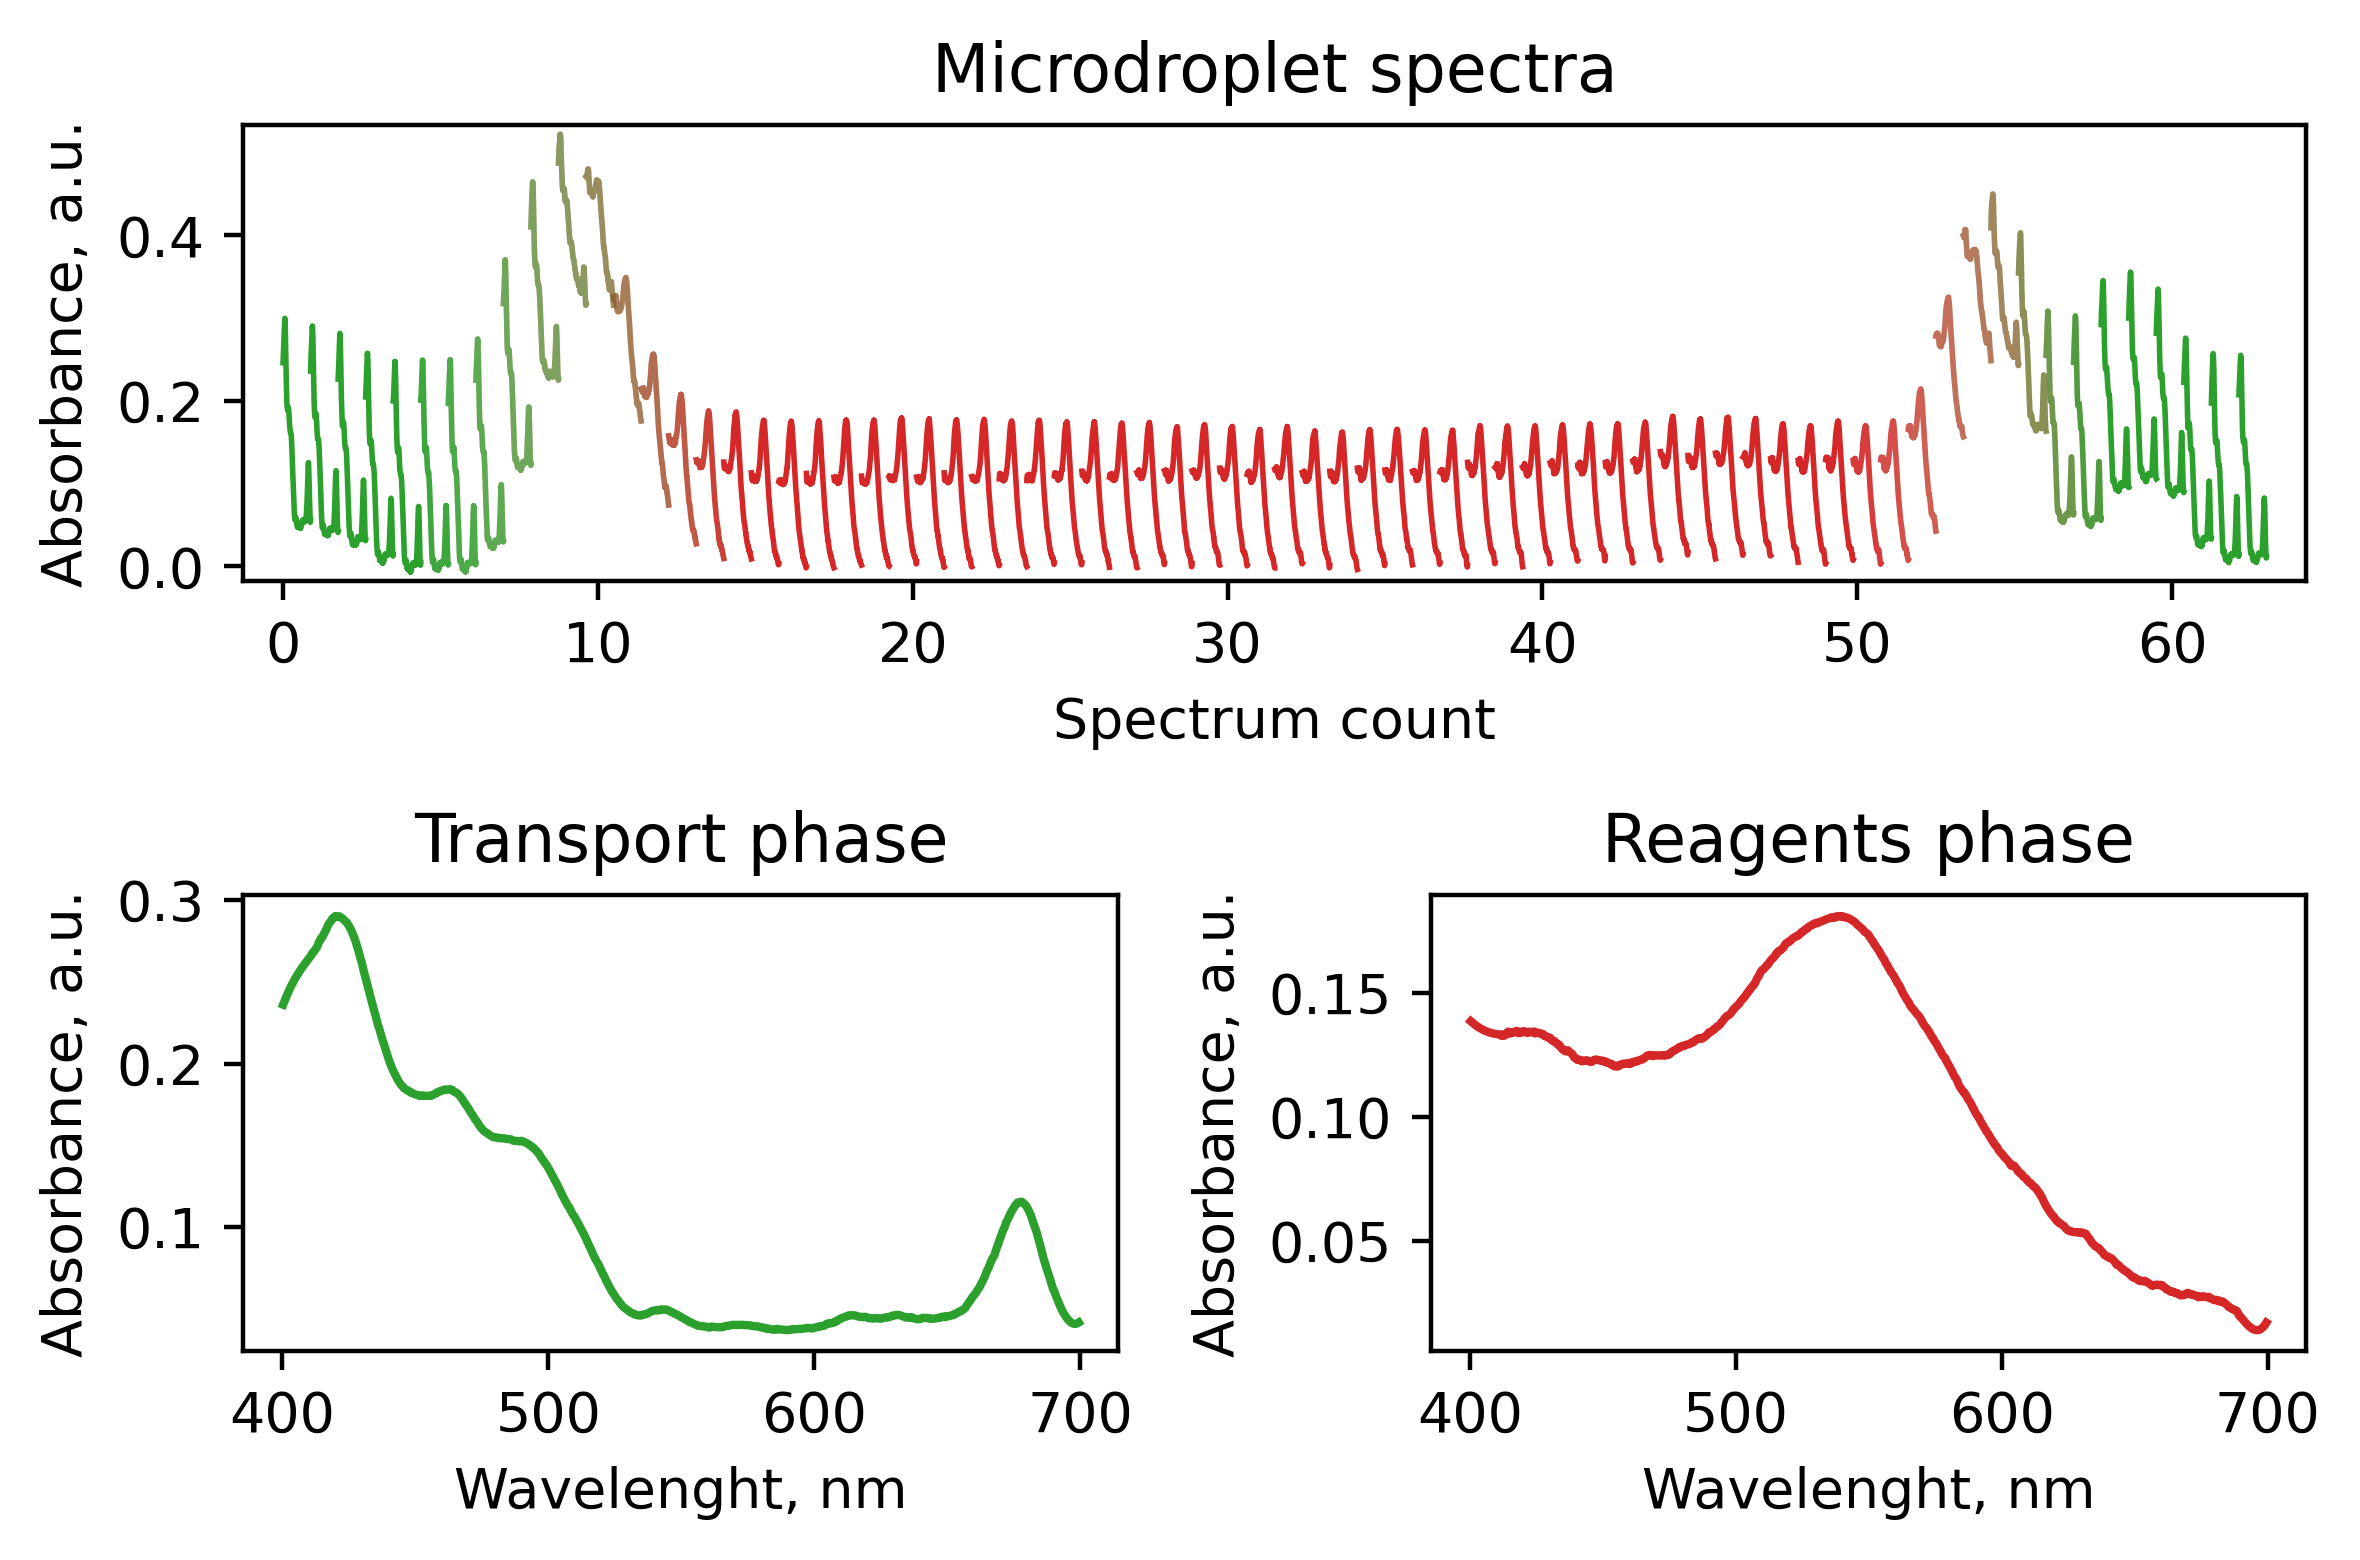

In [9]:
_st=720
_a=80
_mas = data[0][_st : _st + _a]
_l=len(_mas[0])
q=np.arange(0,_l,1)
plt.figure(figsize=(6,4),dpi=400)
plt.subplot(4, 4, (1,8))
plt.title("Microdroplet spectra")
plt.ylabel("Absorbance, a.u.")
plt.xlabel("Spectrum count")
_sp = 0
key =[(0,6,"tab:green"),
      (14,57,"tab:red"),
      (62,70,"tab:green"),
      ]

for i in range(0,5):
    plt.plot(np.arange(_sp, _sp + _l), _mas[i], lw=1, color="tab:green")
    _sp += _l

a=1/(16-4)
b=a
for i in range(5,16):
    plt.plot(np.arange(_sp, _sp + _l), _mas[i], lw=1, color="tab:red",alpha=b)
    plt.plot(np.arange(_sp, _sp + _l), _mas[i], lw=1, color="tab:green",alpha=1-b)
    b+=a
    _sp += _l

for i in range(16,57):
    plt.plot(np.arange(_sp, _sp + _l), _mas[i], lw=1, color="tab:red")
    _sp += _l

a=1/(65-55)
b=a
for i in range(55,65):
    plt.plot(np.arange(_sp, _sp + _l), _mas[i], lw=1, color="tab:green",alpha=b)
    plt.plot(np.arange(_sp, _sp + _l), _mas[i], lw=1, color="tab:red",alpha=1-b)
    b+=a
    _sp += _l

for i in range(65,70):
    plt.plot(np.arange(_sp, _sp + _l), _mas[i], lw=1, color="tab:green")
    _sp += _l




plt.margins(0.02)
plt.xticks(np.arange(0,_sp+1,10000),np.arange(0,70,10))



plt.subplot(4,4,(9,14))
plt.title('Transport phase')
plt.ylabel("Absorbance, a.u.")
plt.xlabel("Wavelenght, nm")
plt.plot(x,_mas[1],c="tab:green")


plt.subplot(4,4,(11,16))
plt.title("Reagents phase")
plt.plot(x,_mas[50],c="tab:red")
plt.ylabel("Absorbance, a.u.")
plt.xlabel("Wavelenght, nm")
plt.tight_layout()

plt.savefig('aq.png')
plt.show()

In [ ]:
_folder = 0

_a = 400
print_grafs = False
k = len(data[_folder])
if k > 4000:
    k = 4001
_num = 0
for _b in range(0,4000, _a):

    if len(data[_folder]) < _b + _a:
        _a = len(data[_folder]) - _b
    _mas = data[_folder][_b : _b + _a]  # 100 cпектров из папки
    # for i in range(len(_mas)):
    #    _mas[i] = signal.savgol_filter(_mas[i], 60, 3)

    # plt.subplots(figsize=[10, 10]);plt.clf()
    fig, axs = plt.subplots(3, 1, figsize=(8.5, 5.5), dpi=150)
    plt.ioff()
    # fig.tit title("синтез " + str(folders_list[_folder]))
    fig.suptitle(
        "Измерение " + str(folders_list[_folder]) + " " + str(_b) + "-" + str(_b + _a)
    )

    _sp = 0
    for i in range(len(_mas)):
        axs[0].plot(np.arange(_sp, _sp + len(_mas[i])), _mas[i], lw=1)
        _sp += len(_mas[i])
    axs[0].set_ylim(-0.05, 0.65)
    axs[0].set_ylabel("Absorbance, a.u.")
   #axs[0].set_xticks(np.arange(0,_sp+1,20*len(_mas[0])))
  #  axs[0].set_xticklabels(np.arange(0,121,20))
    # axs[0].axes.tick_params(axis='x',which='minor',direction='out',bottom=True,length=80)

    axs[1].set_ylabel("I(max), a.u.")
    minus = dmax_list(_mas)
    for i in range(len(_mas)):
        axs[1].scatter(i, minus[i], s=5)
    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    # axs[1].set_ylim(-0.05, 0.5)

    axs[2].set_ylabel("I(max)-I(650), a.u.")
    minus = dmax_650_list(_mas)
    for i in range(len(_mas)):
        axs[2].scatter(i, minus[i], s=5)
    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    axs[2].set_xlabel("Spectra number")
    if print_grafs == True:
        plt.savefig(str(_num + 1) + ".png")
    _num += 1

# fig.clf();fig.clear()

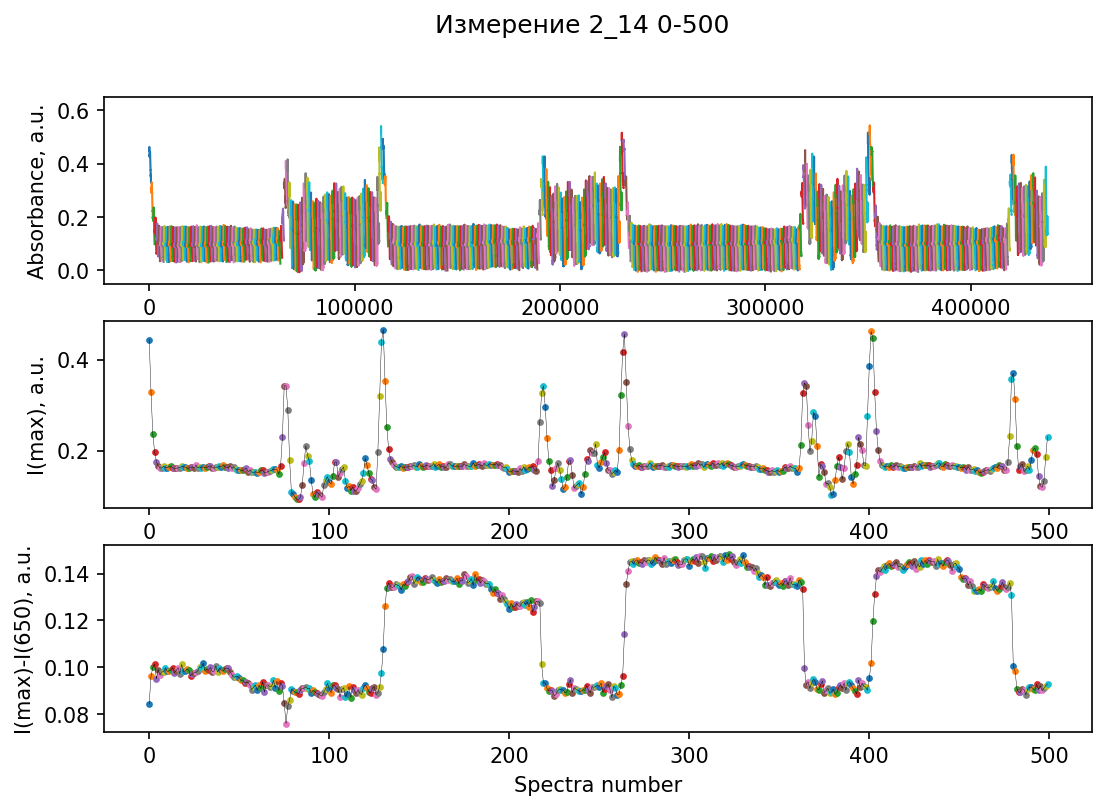

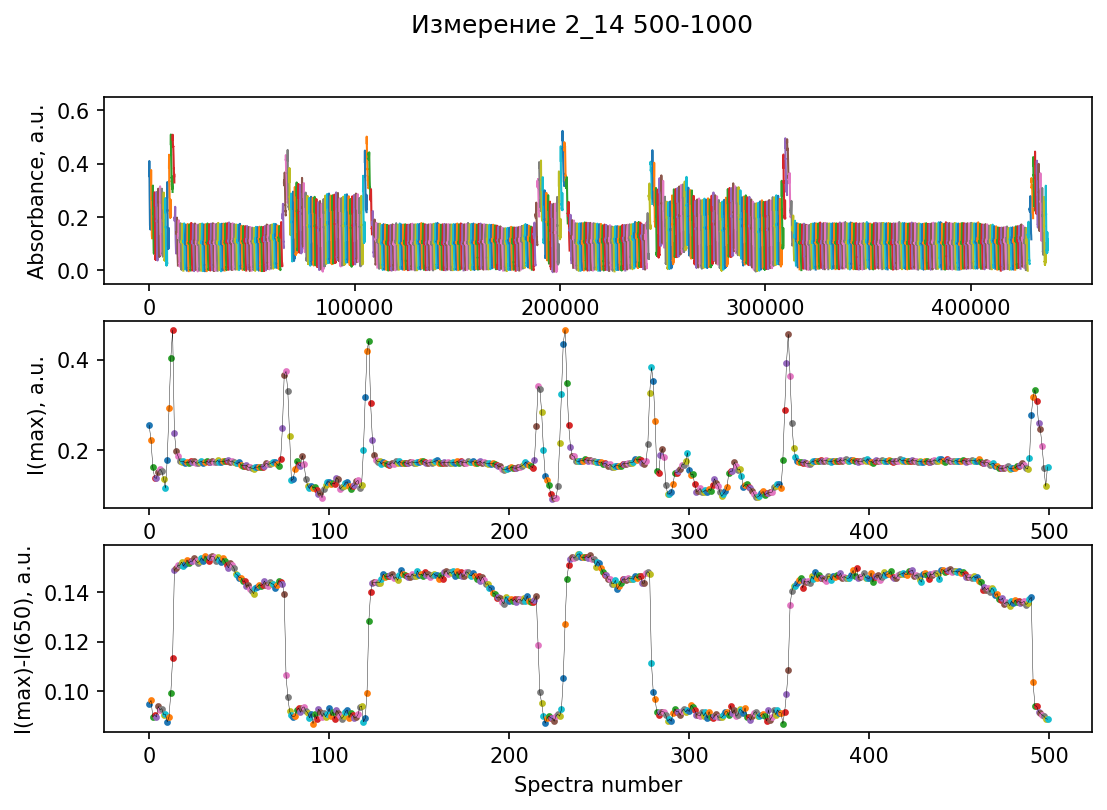

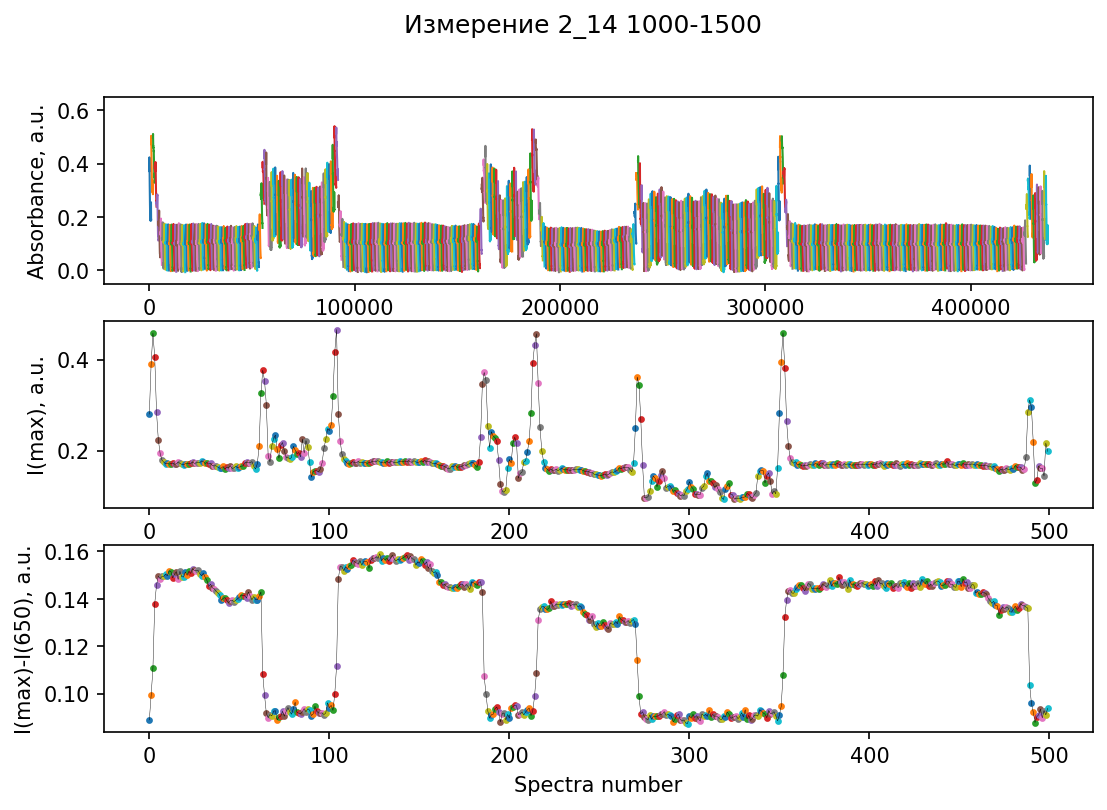

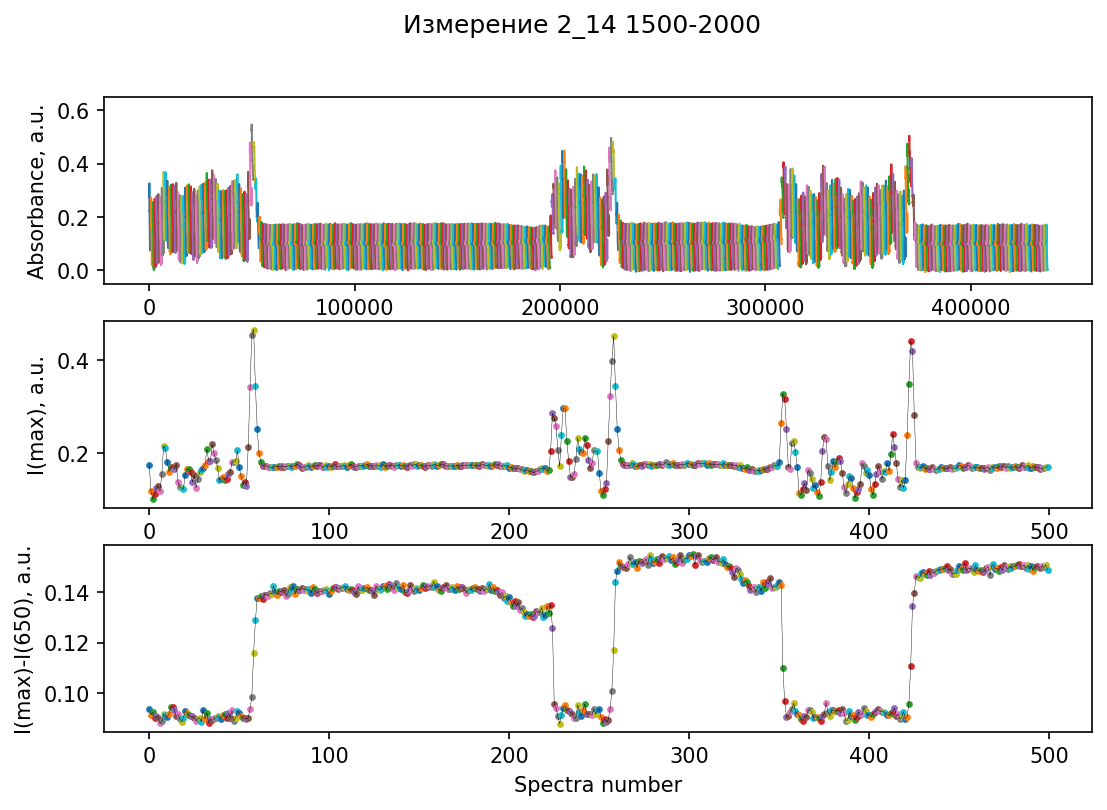

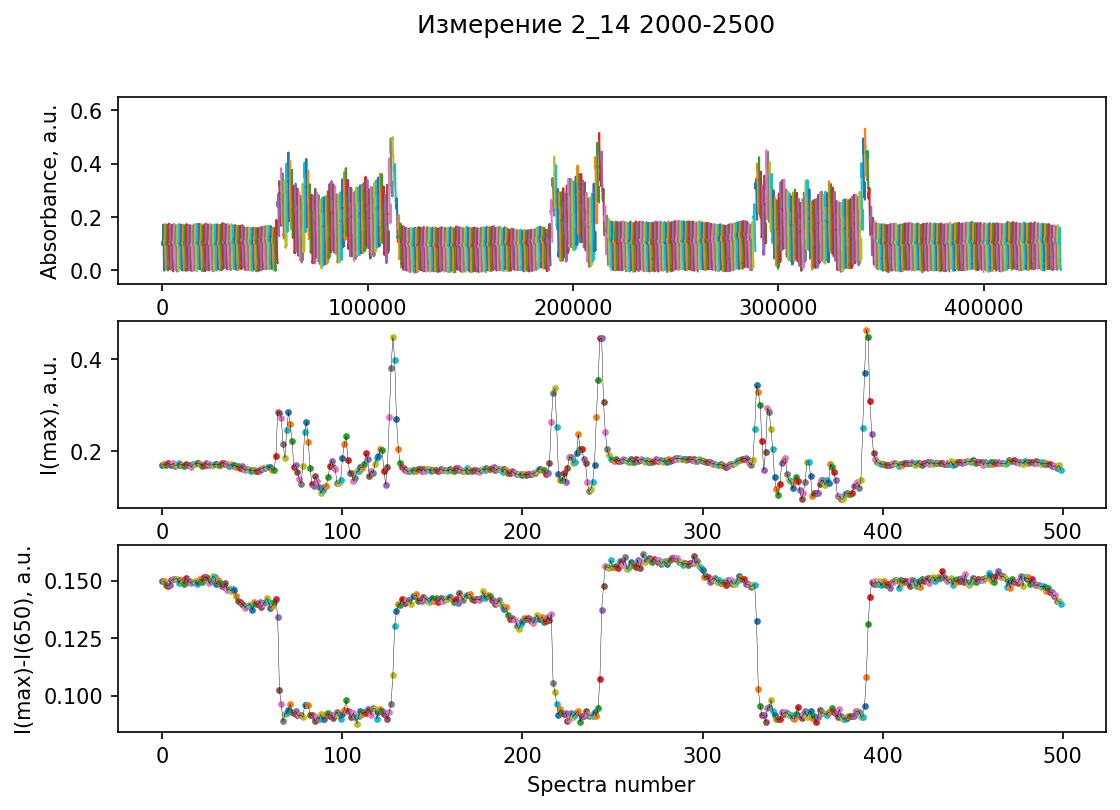

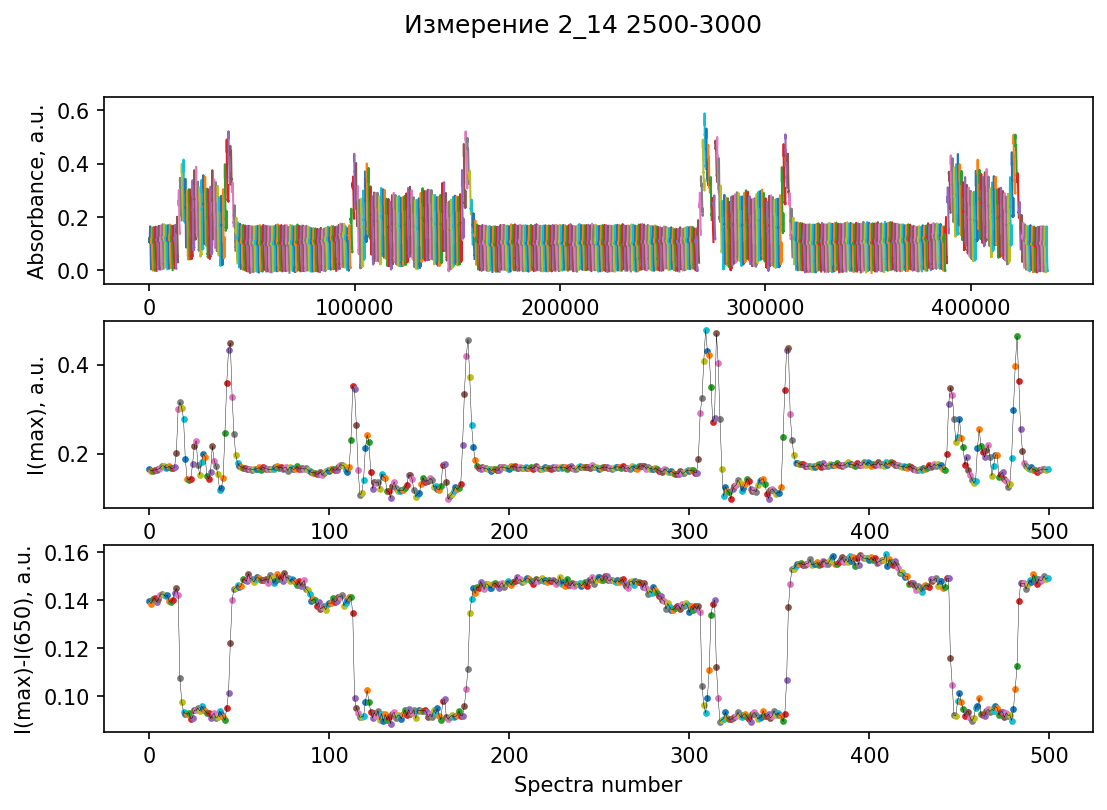

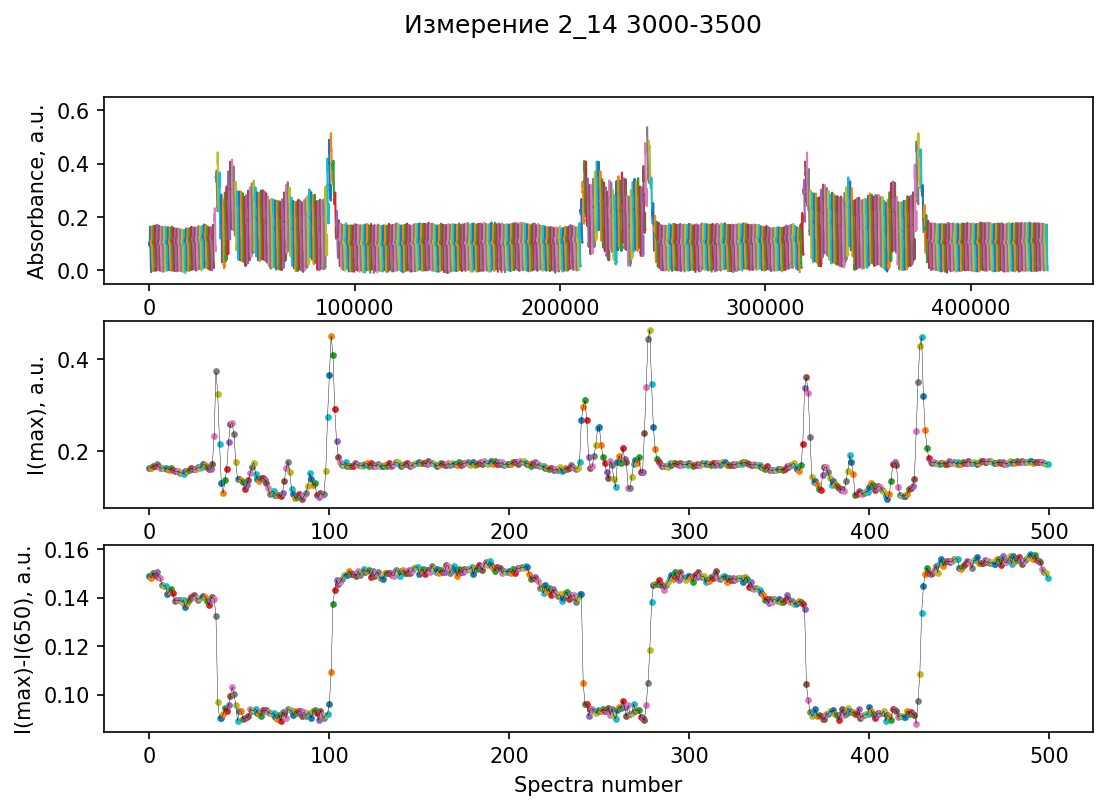

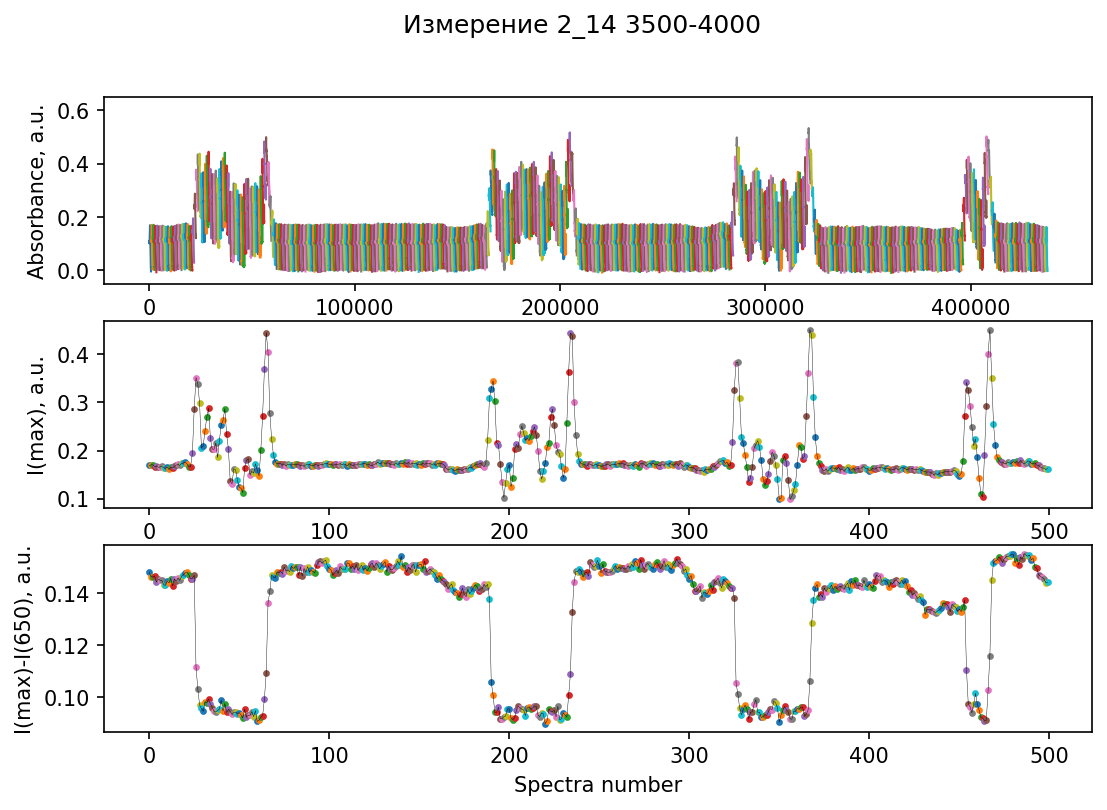

In [39]:
_folder = 0

_a = 500
print_grafs = False
k = len(data[_folder])

_num = 0
for _b in range(0,4000, _a):

    if len(data[_folder]) < _b + _a:
        _a = len(data[_folder]) - _b
    _mas = data[_folder][_b : _b + _a]  # 100 cпектров из папки
    # for i in range(len(_mas)):
    #    _mas[i] = signal.savgol_filter(_mas[i], 60, 3)

    # plt.subplots(figsize=[10, 10]);plt.clf()
    fig, axs = plt.subplots(3, 1, figsize=(8.5, 5.5), dpi=150)
    plt.ioff()
    # fig.tit title("синтез " + str(folders_list[_folder]))
    fig.suptitle(
        "Измерение " + str(folders_list[_folder]) + " " + str(_b) + "-" + str(_b + _a)
    )

    _sp = 0
    for i in range(len(_mas)):
        axs[0].plot(np.arange(_sp, _sp + len(_mas[i])), _mas[i], lw=1)
        _sp += len(_mas[i])
    axs[0].set_ylim(-0.05, 0.65)
    axs[0].set_ylabel("Absorbance, a.u.")
   #axs[0].set_xticks(np.arange(0,_sp+1,20*len(_mas[0])))
  #  axs[0].set_xticklabels(np.arange(0,121,20))
    # axs[0].axes.tick_params(axis='x',which='minor',direction='out',bottom=True,length=80)

    axs[1].set_ylabel("I(max), a.u.")
    minus = dmax_list(_mas)
    for i in range(len(_mas)):
        axs[1].scatter(i, minus[i], s=5)
    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    # axs[1].set_ylim(-0.05, 0.5)

    axs[2].set_ylabel("I(max)-I(650), a.u.")
    minus = dmax_650_list(_mas)
    for i in range(len(_mas)):
        axs[2].scatter(i, minus[i], s=5)
    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    axs[2].set_xlabel("Spectra number")
    if print_grafs == True:
        plt.savefig(str(_num + 1) + ".png")
    _num += 1
plt.show()
# fig.clf();fig.clear()

In [12]:
_folder = 0

_a = 400
print_grafs = False
k = len(data[_folder])
if k > 4000:
    k = 4001
_num = 0
for _b in range(0,4000, _a):

    if len(data[_folder]) < _b + _a:
        _a = len(data[_folder]) - _b
    _mas = data[_folder][_b : _b + _a]  # 100 cпектров из папки
    # for i in range(len(_mas)):
    #    _mas[i] = signal.savgol_filter(_mas[i], 60, 3)

    # plt.subplots(figsize=[10, 10]);plt.clf()
    fig, axs = plt.subplots(3, 1, figsize=(8.5, 5.5), dpi=150)
    plt.ioff()
    # fig.tit title("синтез " + str(folders_list[_folder]))
    fig.suptitle(
        "Измерение " + str(folders_list[_folder]) + " " + str(_b) + "-" + str(_b + _a)
    )

    _sp = 0
    for i in range(len(_mas)):
        axs[0].plot(np.arange(_sp, _sp + len(_mas[i])), _mas[i], lw=1)
        _sp += len(_mas[i])
    axs[0].set_ylim(-0.05, 0.65)
    axs[0].set_ylabel("Absorbance, a.u.")
   #axs[0].set_xticks(np.arange(0,_sp+1,20*len(_mas[0])))
  #  axs[0].set_xticklabels(np.arange(0,121,20))
    # axs[0].axes.tick_params(axis='x',which='minor',direction='out',bottom=True,length=80)

    axs[1].set_ylabel("I(max), a.u.")
    minus = dmax_list(_mas)
    for i in range(len(_mas)):
        axs[1].scatter(i, minus[i], s=5)
    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    # axs[1].set_ylim(-0.05, 0.5)

    axs[2].set_ylabel("I(max)-I(650), a.u.")
    minus = dmax_650_list(_mas)
    for i in range(len(_mas)):
        axs[2].scatter(i, minus[i], s=5)
    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    axs[2].set_xlabel("Spectra number")
    if print_grafs == True:
        plt.savefig(str(_num + 1) + ".png")
    _num += 1

# fig.clf();fig.clear()

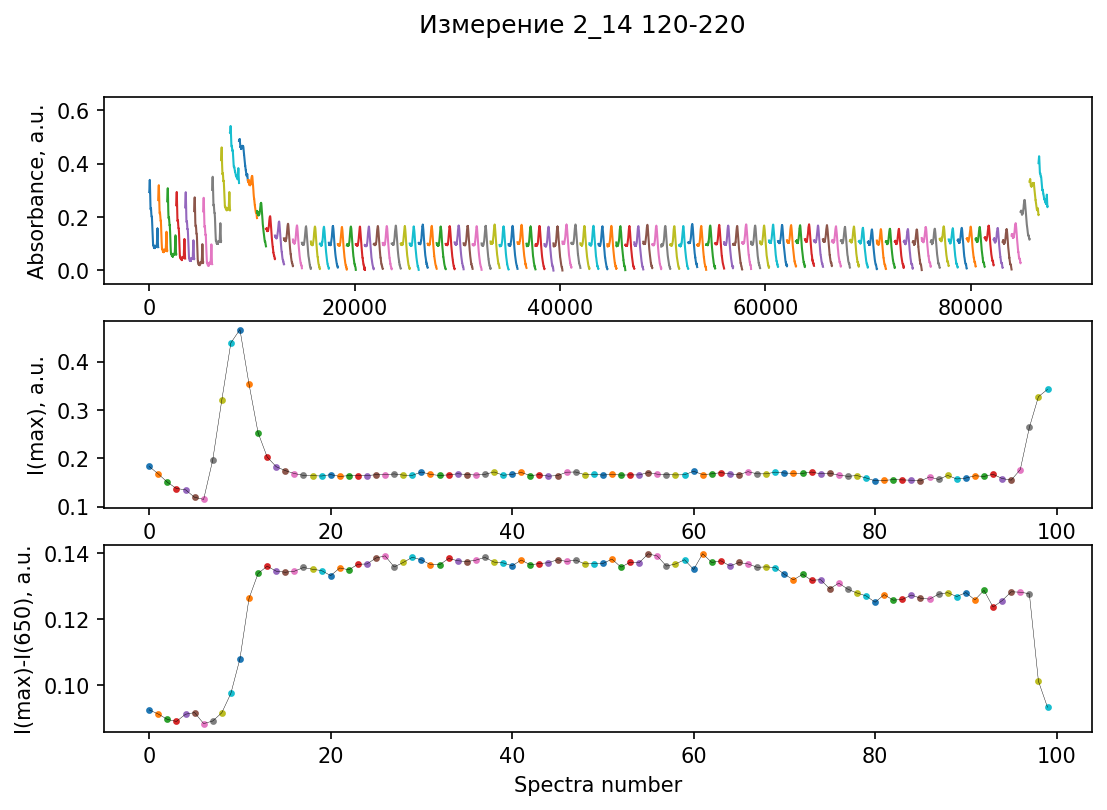

In [15]:
plt.show()

выборка лучших спектров

0.004043580062240896


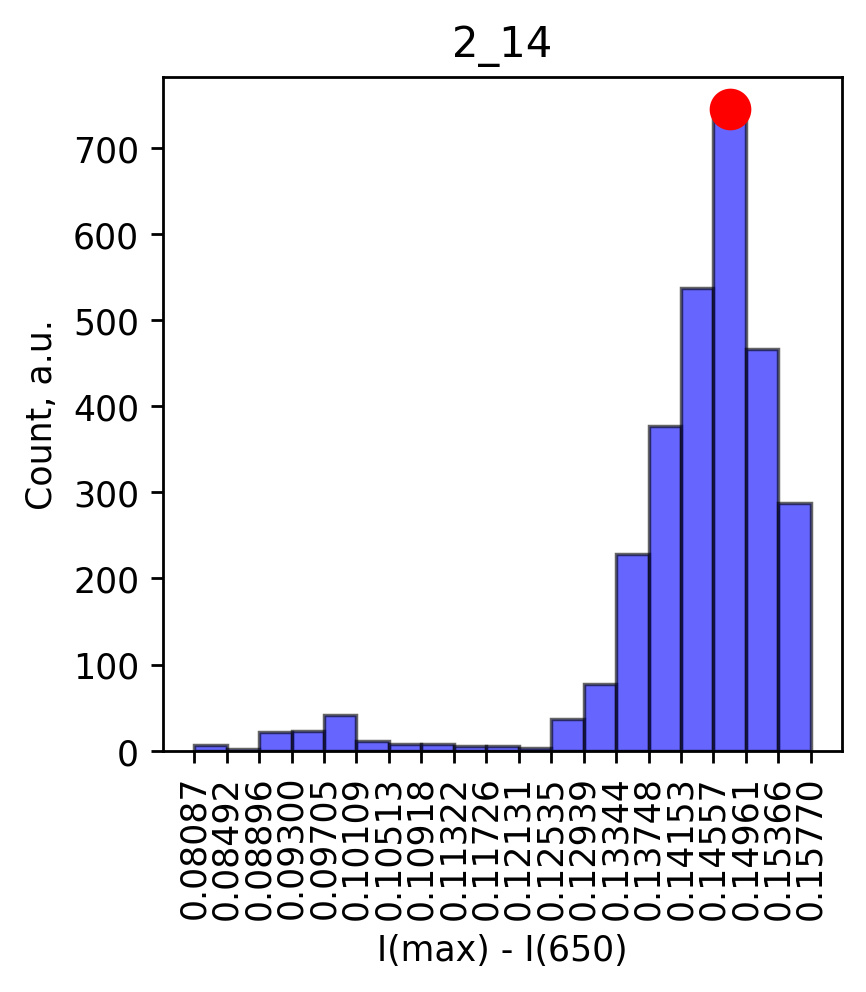

In [6]:
def data_for_hist(mas, ind):
    ar = np.zeros(len(mas))
    if ind == "max":
        for i in range(len(mas)):
            ar[i] = np.max(mas[i][nm_to_x(520) : nm_to_x(600)])
    else:
        for i in range(len(mas)):
            ar[i] = mas[i][ind]
    return ar


print_graf = True
fol = "old"
data_new = []
gap = 0.01
for n in range(len(folders_list)):
    masiv = data[n]
    massiv_row = data_row[n]
    _d = []
    ar_max = data_for_hist(masiv, "max")
    ar_mean = data_for_hist(masiv, nm_to_x(650))
    ar_max_mean = ar_max - ar_mean

    maximum = np.max(ar_max_mean)
    ar = []  # индексы спектров с наибольшей разницей между мах и 650

    num_bins = 20  # количество интервалов
    range_values = (maximum / 2) / num_bins
    print(range_values)
    # границы интервалов
    bin_edges = np.arange(maximum / 2, maximum, range_values)
    # середины интервалов
    bins = bin_edges[:-1] + range_values / 2
    hist, _ = np.histogram(ar_max_mean, bins=bin_edges)
    zero = bin_edges[np.argmax(hist) + 1]
    if print_graf == True:
        fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=250)
        ax.hist(
            ar_max_mean, bin_edges, alpha=0.6, color="blue", edgecolor="k", linewidth=1
        )

        ax.scatter(
            bin_edges[np.argmax(hist[5:20])] + 5.5 * range_values,
            np.max(hist[5:20]),
            color="RED",
            linewidths=6
        )

        #ax.plot(bins, hist, color="red", lw=2)
        plt.title(folders_list[n])
        plt.xticks(rotation=90)
        plt.xlabel('I(max) - I(650)')
        plt.ylabel('Count, a.u.')
        ax.set_xticks(bin_edges)
        plt.savefig(fol + "/" + folders_list[n] + ".png",bbox_inches = 'tight')

    maximum = bin_edges[np.argmax(hist[5:20])] + 5.5 * range_values
    for i in range(len(ar_max_mean)):
        if maximum - range_values < ar_max_mean[i] < maximum + range_values:
            ar.append(i)
    # if len(ar) == 0:
    # continue
    ar2 = []  # значения интенсивнотей в точке max
    for i in range(len(ar)):
        ar2.append(np.max(masiv[ar[i]]))
    minimum = np.min(ar2)

    ar3 = []  # индексы более подходящих спектров
    for i in range(len(ar)):
        if np.max(masiv[ar[i]]) < minimum + gap:
            ar3.append(ar[i])
    for i in range(len(ar3)):
        _d.append(massiv_row[ar3[i]])
    data_new.append(_d)

In [7]:
spec = []  # сглаженный
spec_row = []  # не сглаженный


for i in range(len(data_new)):
    _a = len(data_new[i])

    _b = np.sum(data_new[i], axis=0)

    _b /= _a

    spec.append(signal.savgol_filter(_b, 100, 3))
    spec_row.append(_b)

построение лучших спектров

In [ ]:
import matplotlib as mpl

In [34]:
# построение красивых итоговых графиков
cmap = matplotlib.colormaps.get("Set1")(np.linspace(0, 1, len(spec)))
plt.figure(figsize=(12, 6), dpi=400)
k = 0
for n in range(len(spec)):
    plt.plot(
        x,
        spec[n],
        lw=0.8,
        color=cmap[n],
        label=str(folders_list[n])
        + " "
        + str(round(len(data_new[n]) * 100 / len(data[n]), 2))
        + "%",
    )
plt.xlabel("Длинна волны,нм")
plt.ylabel("Интенсивность, отн.ед.")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig("old.png")

In [ ]:
print(folders_list)

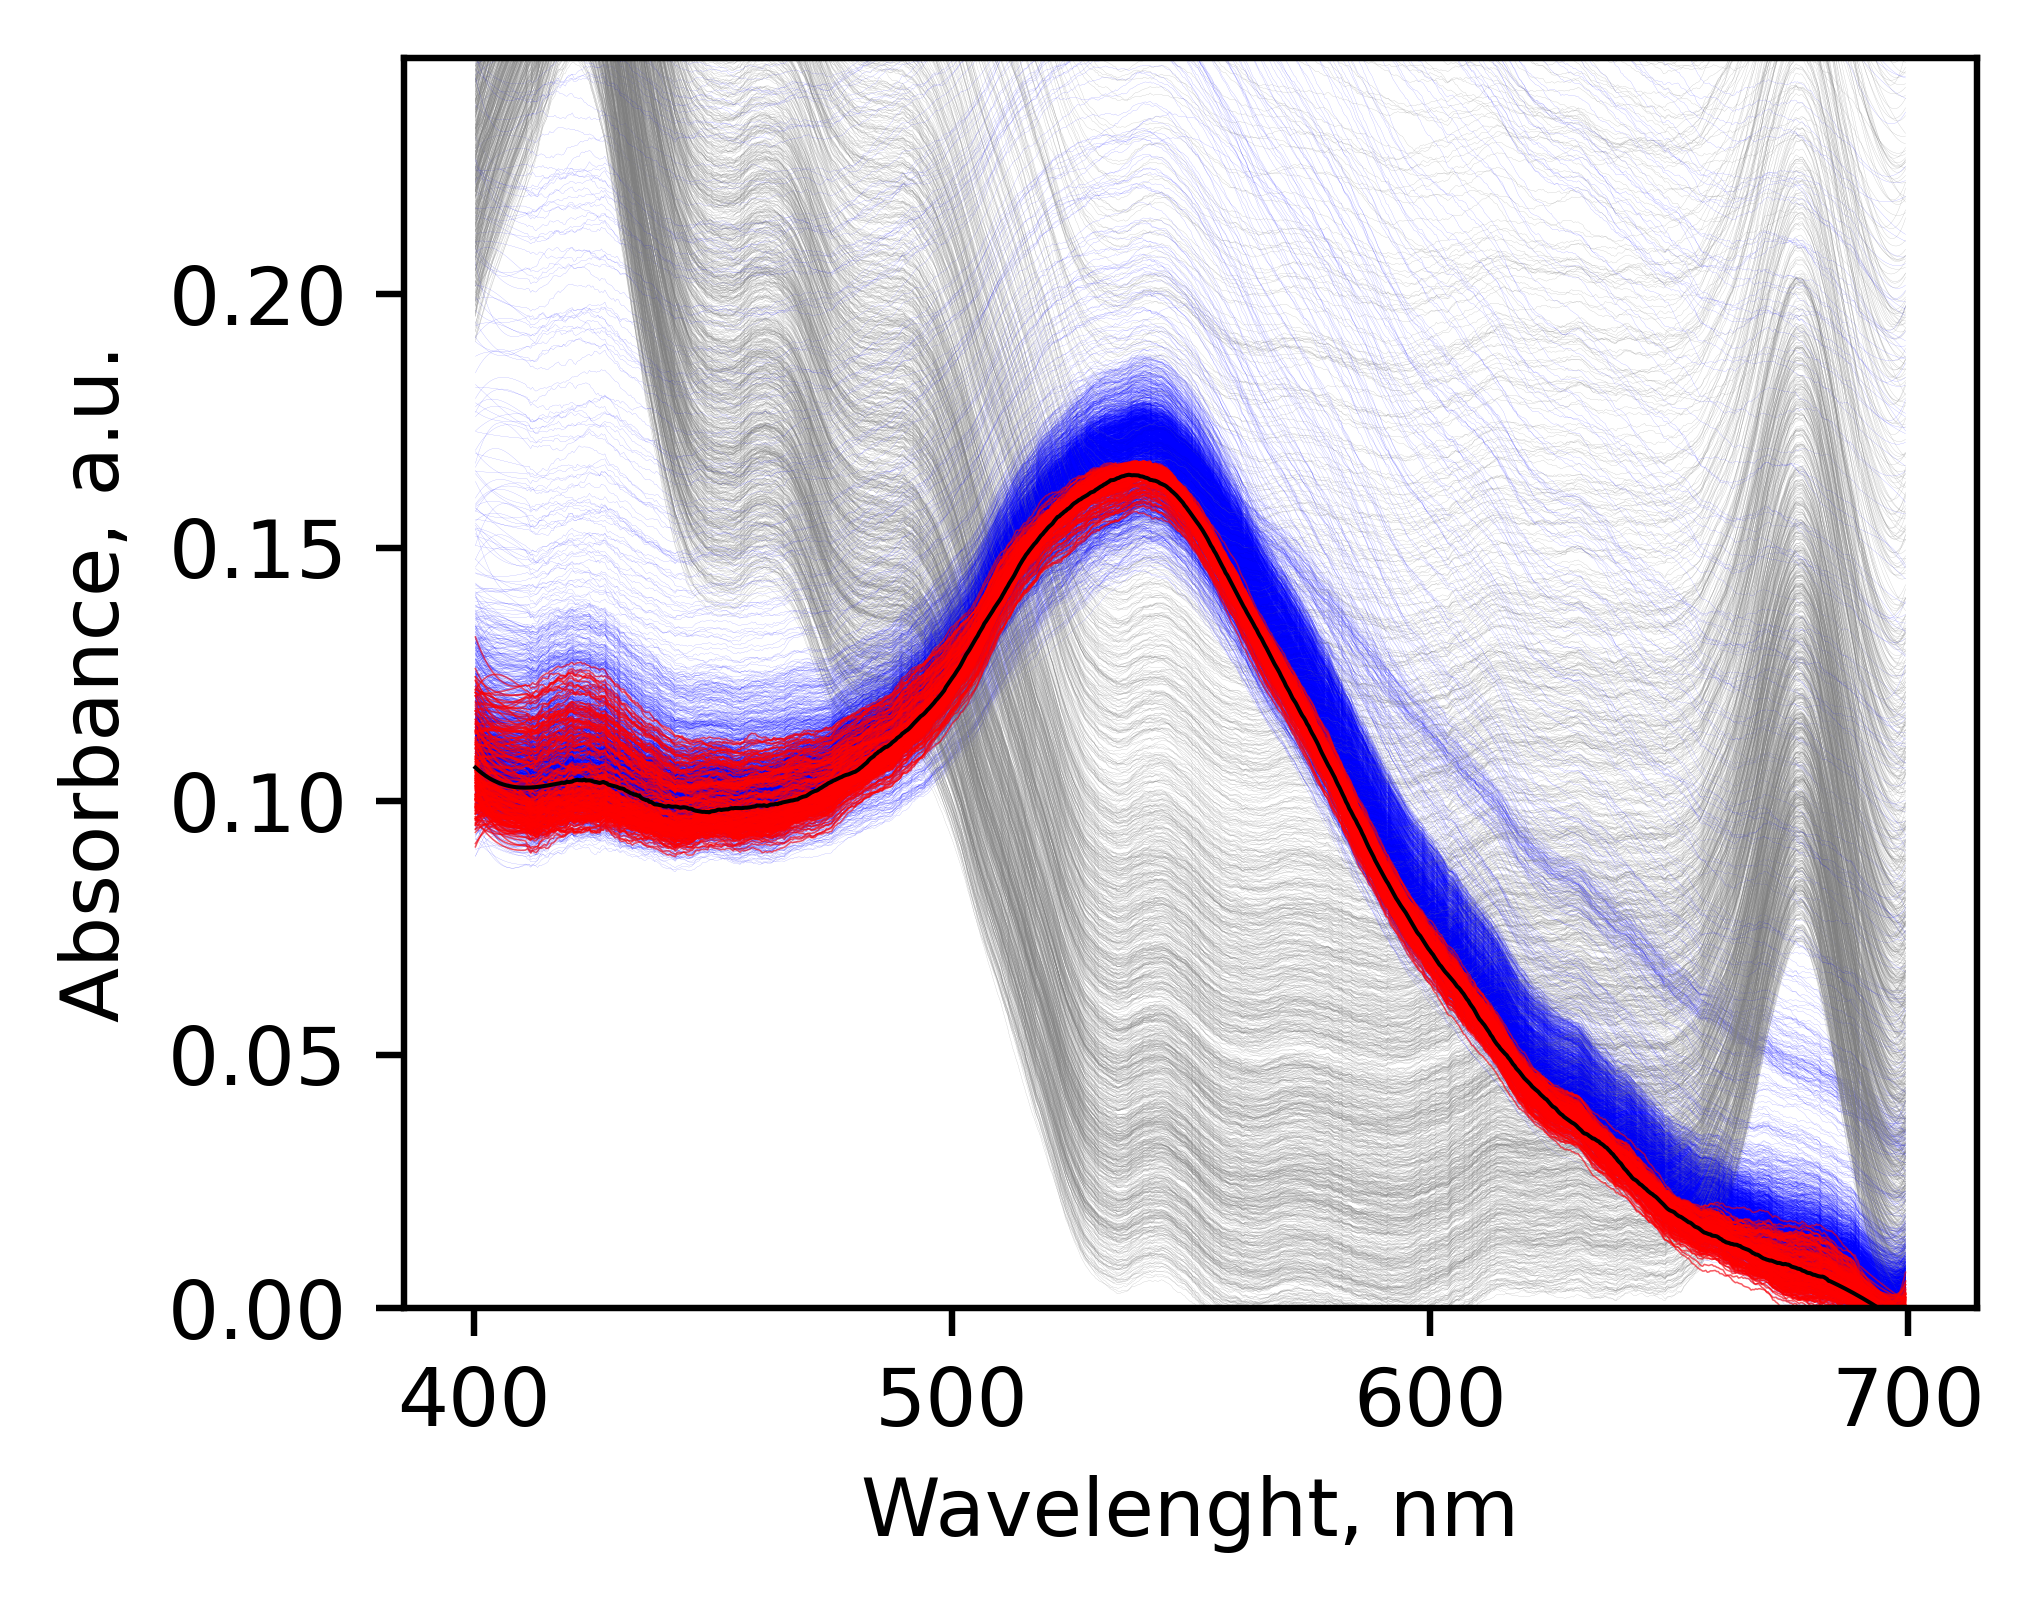

In [16]:
for n in range(len(spec)):
    plt.figure(figsize=(3.5,2.8),dpi=580)
    for i in range(len(data[n])):
        if nm_to_x(520)<np.argmax(data[n][i])<nm_to_x(580):
            plt.plot(
                x,
                data[n][i],
                lw=0.02,
                alpha=0.6,
                color="blue",
            )
        else:
            plt.plot(
                x,
                data[n][i],
                lw=0.03,
                alpha=0.6,
                color="gray",
            )
    for i in range(len(data_new[n])):
        plt.plot(
            x,
            signal.savgol_filter(data_new[n][i], 60, 3),
            lw=0.2,
            alpha=0.6,
            color="red",
        )
    plt.plot(x, spec[n],lw=0.5, color="black")
   
    plt.ylim(0, 1.5 * np.max(spec[n]))
    plt.xlabel("Wavelenght, nm")
    plt.ylabel("Absorbance, a.u.")
    plt.savefig("old/sold/" + str(folders_list[n]) + ".png",bbox_inches = 'tight')
    # matplotlib.pyplot.close(figure)

точки с разными цветами фоном

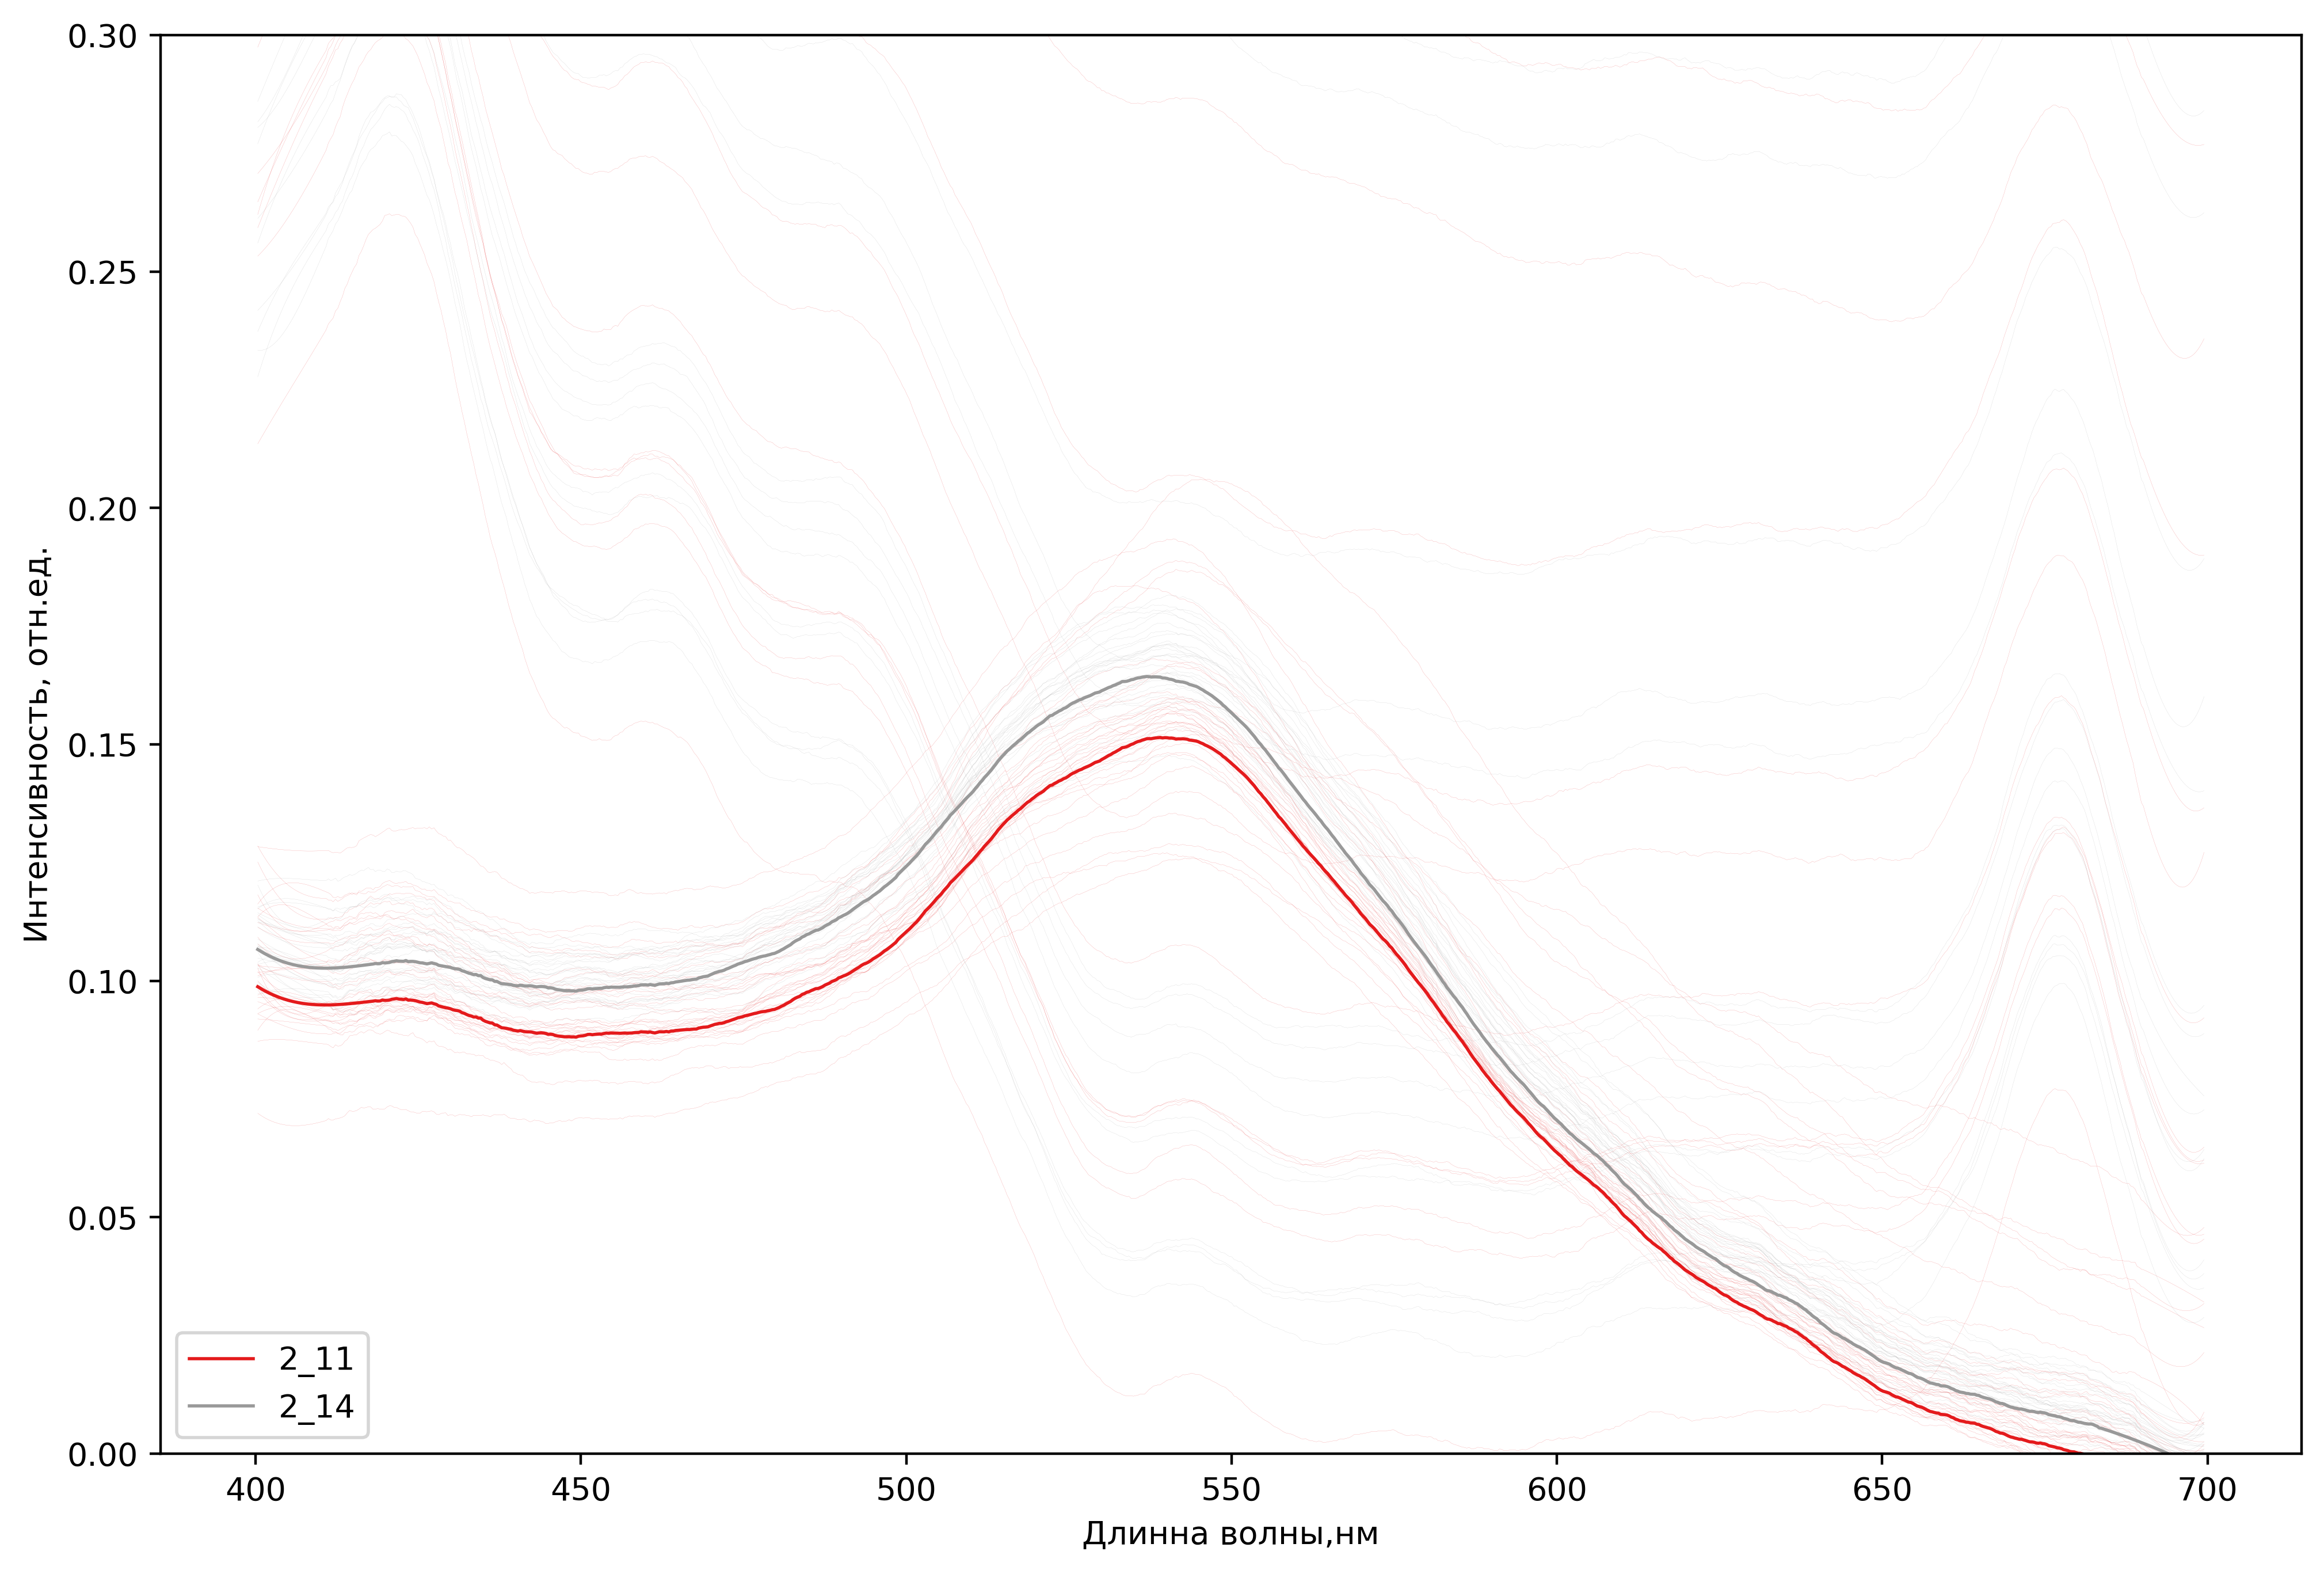

In [18]:
cmap = matplotlib.colormaps.get("Set1")(np.linspace(0, 1, len(spec)))
plt.figure(figsize=(12, 8), dpi=400)
for n in range(len(spec)):
    for i in range(0, len(data[n]), 100):
        plt.plot(
            x,
            data[n][i],
            lw=0.05,
            alpha=0.5,
            color=cmap[n],
        )
for n in range(len(spec)):
    plt.plot(x, spec[n], lw=1, alpha=1, color=cmap[n], label=folders_list[n])

plt.legend()

# plt.plot(x, spec[n], color="red")
plt.ylim(0, 0.3)
plt.xlabel("Длинна волны,нм")
plt.ylabel("Интенсивность, отн.ед.")
plt.savefig("j8910.png")

дескрипторы

In [40]:
def coef_parabola(sp):
    """коэффициенты параболы"""
    _m = np.max(sp)
    _gap = 0.005
    _i = np.argmax(sp)
    if _i == 0 or _i + 300 > len(sp):
        return [0]
    _p, _q = 0, 0
    for i in range(_i, _i + 300):
        if sp[i] < _m - _gap:
            _q = i
            break
    for i in range(_i, _i - 300, -1):
        if sp[i] < _m - _gap:
            _p = i

            break
    try:
        _coefs = np.polyfit(
            x[_p:_q], sp[_p:_q], 2
        )  # Вторым аргументом передается степень полинома
    except:
        return [0]
    return _coefs


def w_h_75(sp):
    """ширина, высота"""
    _h = np.max(sp) - (np.max(sp) - sp[nm_to_x(450)]) * 0.25
    _start, _end = 0, 0
    _ind_max = np.argmax(sp)
    if _ind_max == 0 or _ind_max + 300 > len(sp):
        return [0, 0]
    for i in range(_ind_max, _ind_max + 300):
        if sp[i] <= _h:
            _end = i
            break
    for i in range(_ind_max, _ind_max - 300, -1):
        if sp[i] <= _h:
            _start = i
            break
    _w = x_to_nm(_end) - x_to_nm(_start)
    return (_w, _h, x_to_nm(_start), x_to_nm(_end))


def w_h_50(sp):
    """ширина, высота"""
    _h = np.max(sp) - (np.max(sp) - sp[nm_to_x(450)]) * 0.5
    _start, _end = 0, 0
    _ind_max = np.argmax(sp)
    if _ind_max == 0 or _ind_max + 300 > len(sp):
        return [0, 0]
    for i in range(_ind_max, _ind_max + 300):
        if sp[i] <= _h:
            _end = i
            break
    for i in range(_ind_max, _ind_max - 300, -1):
        if sp[i] <= _h:
            _start = i
            break
    _w = x_to_nm(_end) - x_to_nm(_start)
    return (_w, _h, x_to_nm(_start), x_to_nm(_end))


def angle_old(sp, point):
    _x1 = x_to_nm(np.argmax(sp))
    _y1 = np.max(sp)
    _x2 = point
    _y2 = sp[nm_to_x(point)]
    return ((_y2 - _y1) / (_x2 - _x1), _x1, _x2, _y1, _y2)


def angle(sp, point):
    _w = (650 - x_to_nm(np.argmax(sp))) / 4
    _x1 = x_to_nm(np.argmax(sp)) + _w
    _y1 = sp[nm_to_x(round(_x1))]
    _x2 = point
    _y2 = sp[nm_to_x(round(_x2))]
    return ((_y2 - _y1) / (_x2 - _x1), _x1, _x2, _y1, _y2)

In [41]:
# выбор максимума
S_name = pd.Series(folders_list)
S_Imax = pd.Series(name="I(max)")
S_NMmax = pd.Series(name="I nm")
S_I650 = pd.Series(name="I(650)")
S_Imax_m_I650 = pd.Series(name="I(max) - I(650)")
S_Imax_d_I650 = pd.Series(name="I(max) d I(650)")
S_I400 = pd.Series(name="I(450)")
S_Imax_m_I400 = pd.Series(name="I(max) - I(450)")
S_Imax_d_I400 = pd.Series(name="I(max) d I(450)")
S_I400_d_I650 = pd.Series(name="I(400) d I(650)")
S_coef_a = pd.Series(name="coef A")
S_height75 = pd.Series(name="height75")
S_weight75 = pd.Series(name="weight75")
S_height50 = pd.Series(name="height50")
S_weight50 = pd.Series(name="weight50")
S_angle = pd.Series(name="ang")
_sp = nm_to_x(450)
for i in range(len(spec)):
    S_Imax.loc[i] = np.max(spec[i])
    S_NMmax.loc[i] = x[np.argmax(spec[i])]
    S_I650.loc[i] = spec[i][tail_x]
    S_Imax_m_I650.loc[i] = S_Imax.loc[i] - S_I650.loc[i]
    S_Imax_d_I650.loc[i] = S_Imax.loc[i] / S_I650.loc[i]
    S_I400.loc[i] = spec[i][_sp]
    S_Imax_m_I400.loc[i] = S_Imax.loc[i] - S_I400.loc[i]
    S_Imax_d_I400.loc[i] = S_Imax.loc[i] / S_I400.loc[i]
    S_I400_d_I650.loc[i] = S_I400.loc[i] / S_I650.loc[i]
    S_coef_a.loc[i] = coef_parabola(spec[i])[0]
    _w_h = w_h_75(spec[i])
    S_height75.loc[i] = _w_h[1]
    S_weight75.loc[i] = _w_h[0]
    _w_h = w_h_50(spec[i])
    S_height50.loc[i] = _w_h[1]
    S_weight50.loc[i] = _w_h[0]
    S_angle.loc[i] = angle(spec[i], 600)[0]

In [42]:
print(S_angle)

0   -0.001662
Name: ang, dtype: float64


In [47]:
for n in range(len(spec)):
    plt.figure(figsize=(3.5, 3.5), dpi=300)
    plt.ioff()
    plt.title(folders_list[n])
    # спектр
    plt.plot(x, spec[n], c="black")
    # максимум
    plt.scatter(S_NMmax[n], S_Imax[n], c="red", label="I(max) nm: " + str(S_NMmax[n]))
    plt.scatter(
        S_NMmax[n], S_Imax[n], c="red", label="I(max) : " + str(round(S_Imax[n], 5))
    )
    # 450
    plt.scatter(
        450,
        S_I400[n],
        c="blue",
        label="I(450) : "
        + str(round(S_I400[n], 5))
        + "\n"
        + "I(max) - I(450) : "
        + str(round(S_Imax_m_I400[n], 5))
        + "\n"
        + "I(max) d I(450) : "
        + str(round(S_Imax_d_I400[n], 5)),
    )
    # 650
    plt.scatter(
        650,
        S_I650[n],
        c="green",
        label="I(650) : "
        + str(round(S_I650[n], 5))
        + "\n"
        + "I(max) - I(650) : "
        + str(round(S_Imax_m_I650[n], 5))
        + "\n"
        + "I(max) d I(650) : "
        + str(round(S_Imax_d_I650[n], 5)),
    )
    # парабола
    coef = coef_parabola(spec[n])
    x1 = np.linspace(S_NMmax[n] - 15, S_NMmax[n] + 15, 100)
    plt.plot(
        x1,
        coef[0] * x1**2 + coef[1] * x1 + coef[2],
        alpha=0.9,
        c="crimson",
        label="coef a : " + str(round(coef[0], 8)),
    )
    # ширина на 75%высоты
    plt.plot(
        (w_h_75(spec[n])[2], w_h_75(spec[n])[3]),
        (S_height75[n], S_height75[n]),
        c="seagreen",
        label="weight75 : " + str(round(S_weight75[n], 3)),
    )
    # высота на 75%высоты
    plt.plot(
        (w_h_75(spec[n])[2], w_h_75(spec[n])[2]),
        (0, S_height75[n]),
        c="mediumblue",
        label="height75 : " + str(round(S_height75[n], 5)),
    )
    # ширина на 75%высоты
    plt.plot(
        (w_h_50(spec[n])[2], w_h_50(spec[n])[3]),
        (S_height50[n], S_height50[n]),
        c="springgreen",
        label="weight50 : " + str(round(S_weight50[n], 3)),
    )
    # высота на 75%высоты
    plt.plot(
        (w_h_50(spec[n])[2], w_h_50(spec[n])[2]),
        (0, S_height50[n]),
        c="purple",
        label="height50 : " + str(round(S_height50[n], 5)),
    )
    ang = angle(spec[n], 600)
    plt.plot(
        (ang[1], ang[2]),
        (ang[3], ang[4]),
        c="orange",
        label="angle : " + str(round(ang[0], 7)),
    )
    plt.xlabel("Wavelenght, nm")
    plt.ylabel("Absorbance, a.u.")

   # plt.legend(loc="upper right")
    plt.savefig("old/des/" + str(folders_list[n]) + ".png",bbox_inches = 'tight')

построение карт

In [ ]:
import sys

sys.path.append(r"C:\Users\Nik\Desktop\prog")
from pyfitit import *

In [ ]:
data_measure = pd.concat(
    [
        S_Imax,
        S_NMmax,
        S_I650,
        S_Imax_m_I650,
        S_Imax_d_I650,
        S_I400,
        S_Imax_m_I400,
        S_Imax_d_I400,
        S_coef_a,
        S_height75,
        S_weight75,
        S_height50,
        S_weight50,
        S_angle,
    ],
    axis=1,
)
data_measure.to_excel("output old.xlsx", index=False)

In [ ]:
data_speed = pd.read_excel("speed test.xlsx")
data_measure = pd.concat(
    [
        S_Imax,
        S_NMmax,
        S_I650,
        S_Imax_m_I650,
        S_Imax_d_I650,
        S_I400,
        S_Imax_m_I400,
        S_Imax_d_I400,
        S_coef_a,
        S_height75,
        S_weight75,
        S_height50,
        S_weight50,
        S_angle,
    ],
    axis=1,
)
data_table = pd.concat([data_speed, data_measure], axis=1)
print(data_table.columns[0:])

In [ ]:
data_table.to_excel("output test.xlsx", index=False)

In [ ]:
data_table = data_table.drop(10)
print(data_table)

In [ ]:
df = pd.read_csv("params copy.csv", sep="\t")

In [ ]:
df = pd.read_excel("output test cut.xlsx")

In [ ]:
data_table = df
print(data_table)

In [ ]:
# 2D КАРТЫ
# import sklearn
data_table["имя"] = data_table["имя"].astype(str)
plotDescriptors2d(
    data_table,
    descriptorNames=["v АК", "v ЦН"],
    # labelNames=data_table.columns[5:],
    labelNames=[
        "I(max)",
        "I nm",
        "I(650)",
        "I(max)-I(650)",
        "I(400)",
        "I(max)-I(400)",
        "coef A",
        "height",
        "weight",
        "ang",
    ],
    textColumn=data_table.columns[0],
    cv_count=len(data_table),
    # unknown="unknown.params",
    folder_prefix="results/des",
    # model_regr=sklearn.linear_model.RidgeCV(),
)

In [ ]:
print(len(spec.pop(len(data_table))))

In [ ]:
sample = Sample(
    params=data_table,
    spectra=spec[0 : len(data_table)],
    energy=x,
    meta=dict(nameColumn="имя"),
)

sample.saveToFolder("sample")

In [ ]:
# data_table["имя"] = data_table["имя"].astype(str)
# sample = Sample(params=data_table, spectra=spec.pop(len(data_table)), energy=x, meta=dict(nameColumn="имя"))

# sample.saveToFolder("sample")
descriptor.plot_cv_result(
    sample,
    # textColumn=data_table.columns[0],
    features=["v АК", "v ХЗ", "v ЦН"],
    label_names=[
        "I(max)",
        "I nm",
        "I(650)",
        "I(max)-I(650)",
        "I(400)",
        "I(max)-I(400)",
        "coef A",
        "height",
        "weight",
        "ang",
    ],
    folder="results/1",
    cv_count=len(data_table),
    # repForStdCalc=1,
)

In [ ]:
print(data_table)